In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis
from MDAnalysis.analysis import rdf
import MDAnalysis.analysis.msd as msd
# Load the trajectory
traj1_5 = MDAnalysis.Universe("../Data/equil/kalj_T1.5_n360_v300_10000_1.lammpstrj", "../Data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj1_0 = MDAnalysis.Universe("../Data/equil/kalj_T1_n360_v300_50000_1.lammpstrj", "../Data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_9 = MDAnalysis.Universe("../Data/equil/kalj_T0.9_n360_v300_150000_1.lammpstrj", "../Data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_8 = MDAnalysis.Universe("../Data/equil/kalj_T0.8_n360_v300_150000_1.lammpstrj", "../Data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_7 = MDAnalysis.Universe("../Data/equil/kalj_T0.7_n360_v300_180000_1.lammpstrj", "../Data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_65 = MDAnalysis.Universe("../Data/equil/kalj_T0.65_n360_v300_350000_1.lammpstrj", "../Data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_6 = MDAnalysis.Universe("../Data/equil/kalj_T0.6_n360_v300_1000000_1.lammpstrj", "../Data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_55 = MDAnalysis.Universe("../Data/equil/kalj_T0.55_n360_v300_3000000_1.lammpstrj", "../Data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_5 = MDAnalysis.Universe("../Data/equil/kalj_T0.5_n360_v300_10000000_1.lammpstrj", "../Data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_475 = MDAnalysis.Universe("../Data/equil/kalj_T0.475_n360_v300_30000000_1.lammpstrj", "../Data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")
traj0_45 = MDAnalysis.Universe("../Data/equil/kalj_T0.45_n360_v300_100000000_1.lammpstrj", "../Data/prod/kalj_T0.45_n360_v300_prod_100000000_1.unwrap.dcd", topology_format="LAMMPSDUMP")


/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


# Plot RDF at each temp individually
## Scroll down to skip to overlay plot

<AtomGroup [<Atom 1: of type 1 resid 1 and segid SYSTEM>, <Atom 2: of type 1 resid 1 and segid SYSTEM>, <Atom 3: of type 1 resid 1 and segid SYSTEM>, ..., <Atom 286: of type 1 resid 1 and segid SYSTEM>, <Atom 287: of type 1 resid 1 and segid SYSTEM>, <Atom 288: of type 1 resid 1 and segid SYSTEM>]>


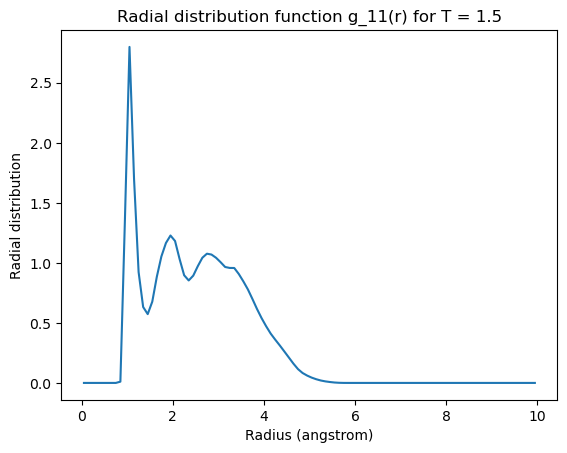

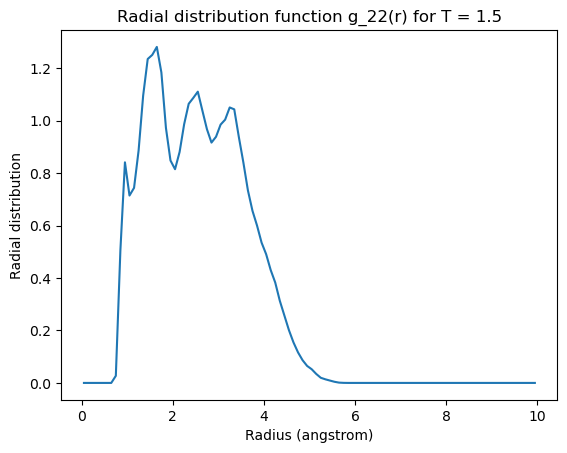

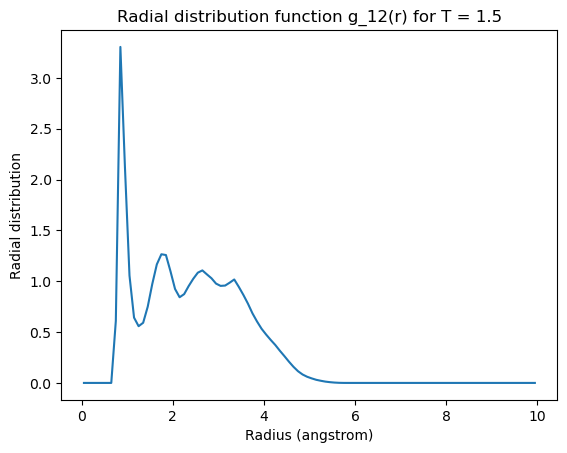

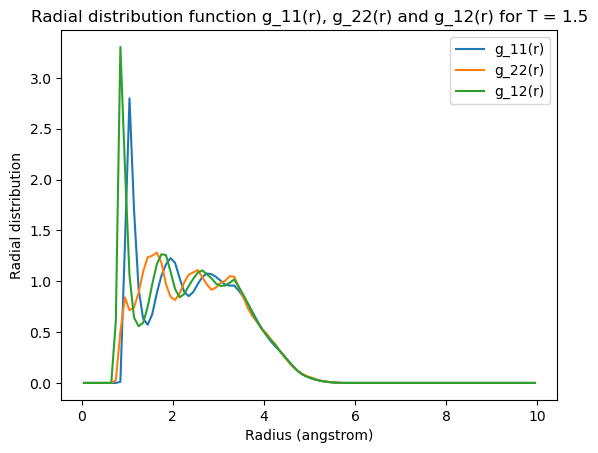

In [2]:
# selecting the atoms 1 and 2 for the rdf calculation at T=1.5
traj1_5_a1 = traj1_5.select_atoms("type 1")
print (traj1_5_a1)
traj1_5_a2 = traj1_5.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj1_5_a1, traj1_5_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 1.5')
# plt.savefig('g_11_T1.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj1_5_a2, traj1_5_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 1.5')
# plt.savefig('g_22_T1.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj1_5_a1, traj1_5_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 1.5')
# plt.savefig('g_12_T1.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)   
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 1.5')
plt.legend()
# plt.savefig('g_11_22_12_T1.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

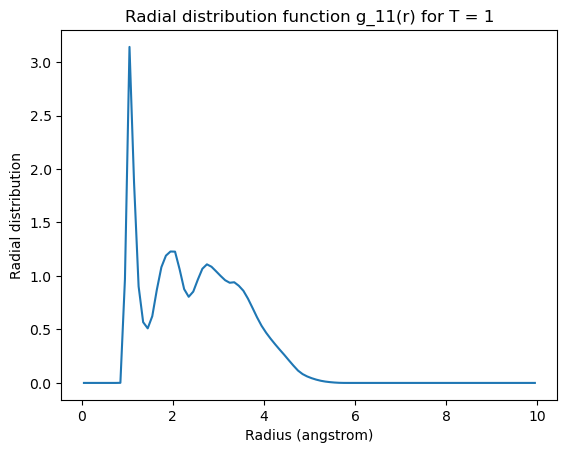

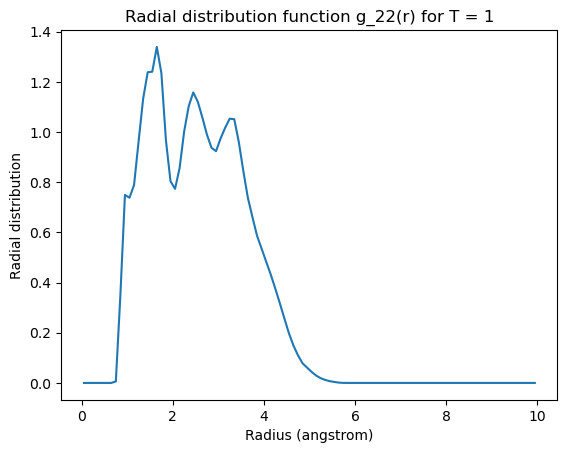

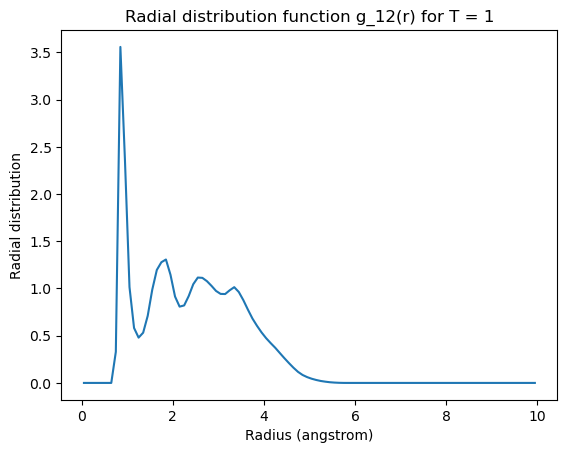

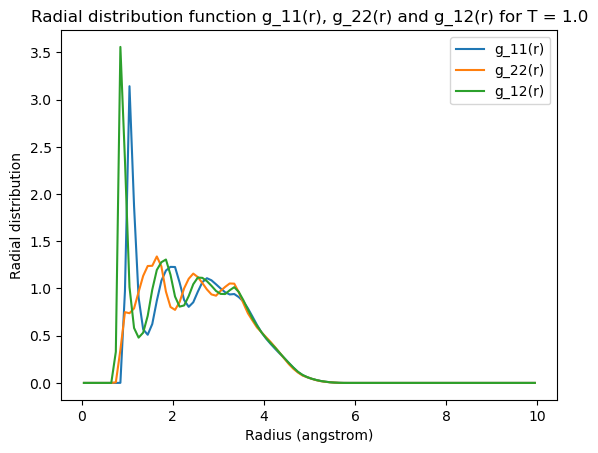

In [45]:
# selecring the atoms 1 and 2 for the rdf calculation at T=1
traj1_0_a1 = traj1_0.select_atoms("type 1")
traj1_0_a2 = traj1_0.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj1_0_a1, traj1_0_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 1')
plt.savefig('g_11_T1.0.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj1_0_a2, traj1_0_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 1')
plt.savefig('g_22_T1.0.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj1_0_a1, traj1_0_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 1')
plt.savefig('g_12_T1.0.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 1.0')
plt.legend()
plt.savefig('g_11_22_12_T1.0.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

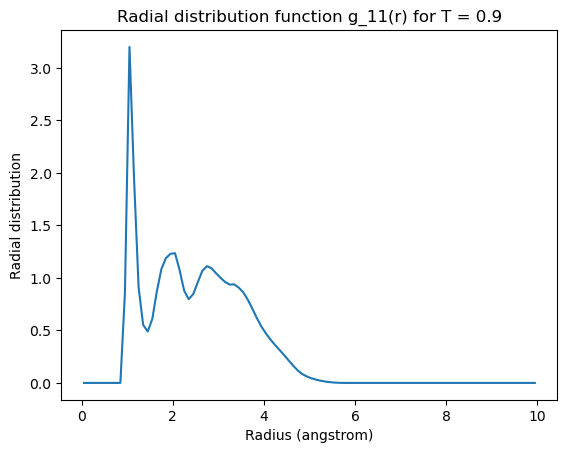

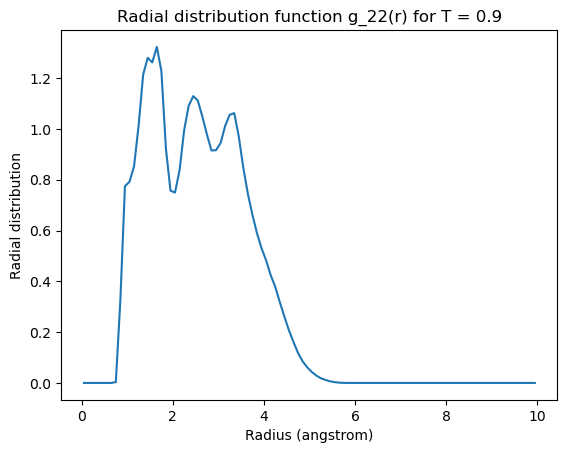

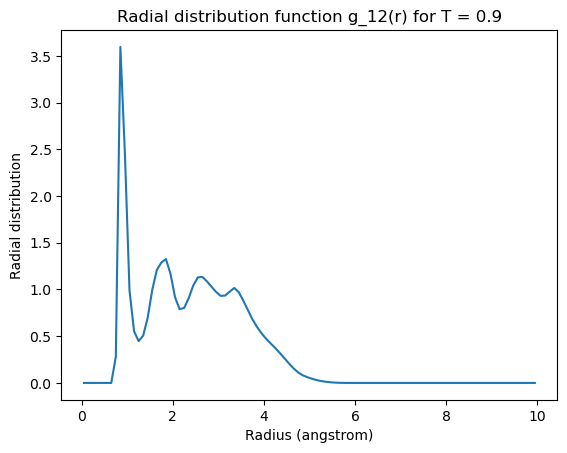

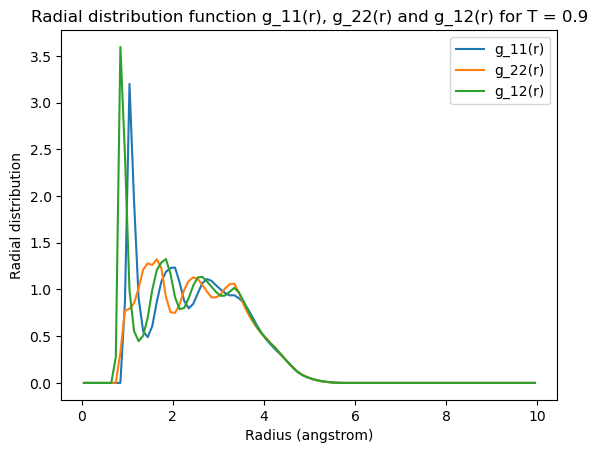

In [46]:
# selecring the atoms 1 and 2 for the rdf calculation at T=0.9
traj0_9_a1 = traj0_9.select_atoms("type 1")
traj0_9_a2 = traj0_9.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_9_a1, traj0_9_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.9')
plt.savefig('g_11_T0.9.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_9_a2, traj0_9_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.9')
plt.savefig('g_22_T0.9.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_9_a1, traj0_9_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.9')
plt.savefig('g_12_T0.9.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.9')
plt.legend()
plt.savefig('g_11_22_12_T0.9.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

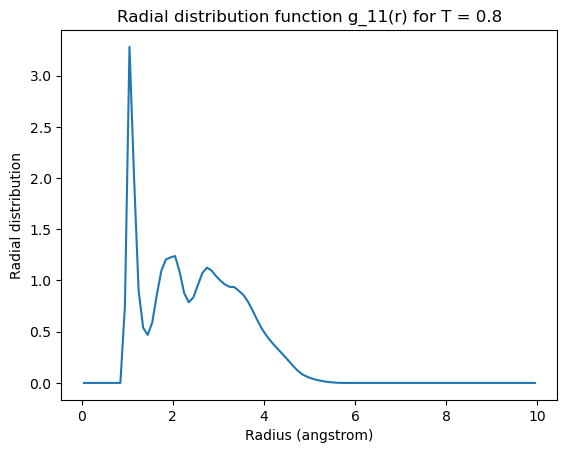

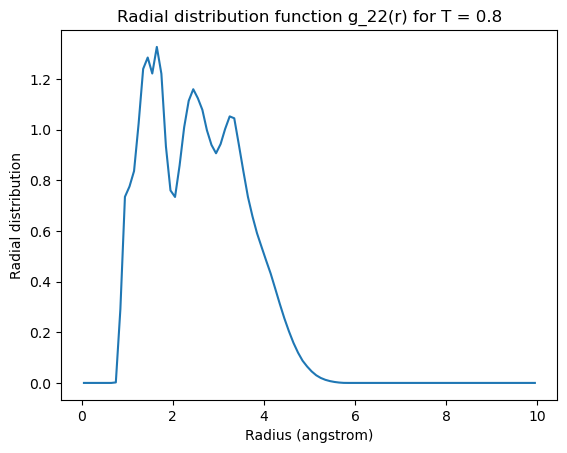

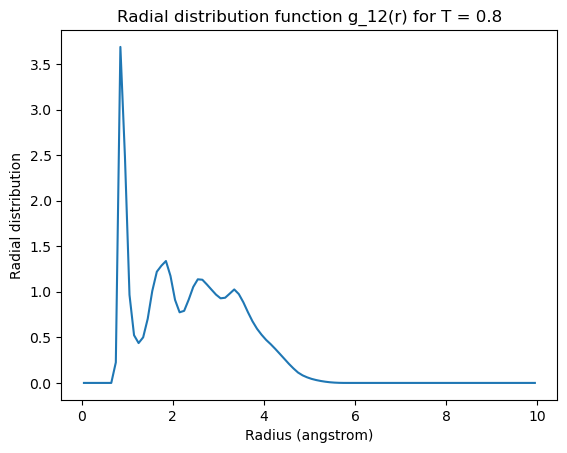

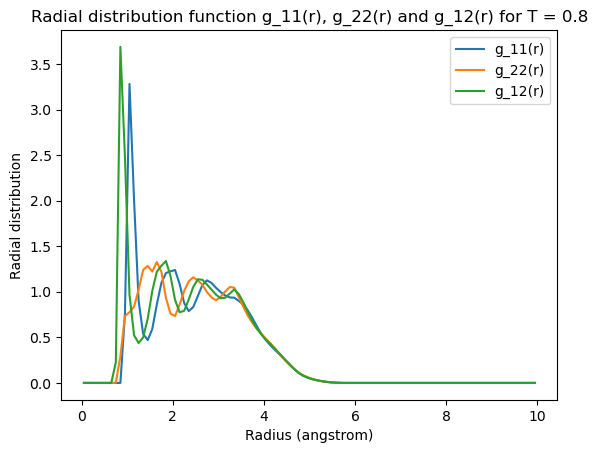

In [47]:
# Selecring the atoms 1 and 2 for the rdf calculation at T=0.8
traj0_8_a1 = traj0_8.select_atoms("type 1")
traj0_8_a2 = traj0_8.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_8_a1, traj0_8_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.8')
plt.savefig('g_11_T0.8.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_8_a2, traj0_8_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.8')
plt.savefig('g_22_T0.8.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_8_a1, traj0_8_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.8')
plt.savefig('g_12_T0.8.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.8')
plt.legend()
plt.savefig('g_11_22_12_T0.8.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

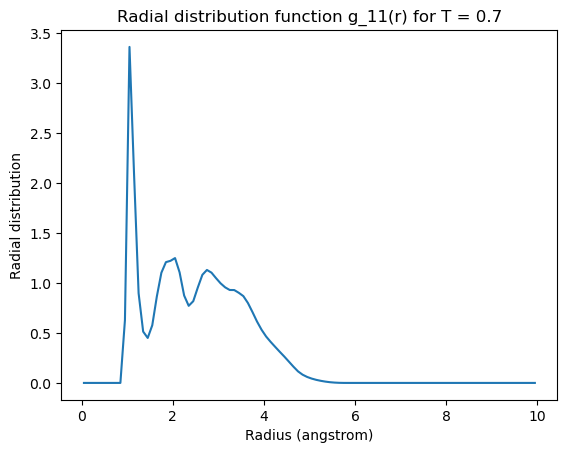

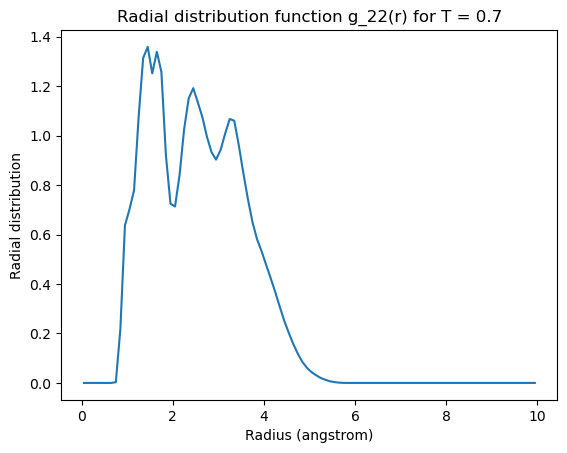

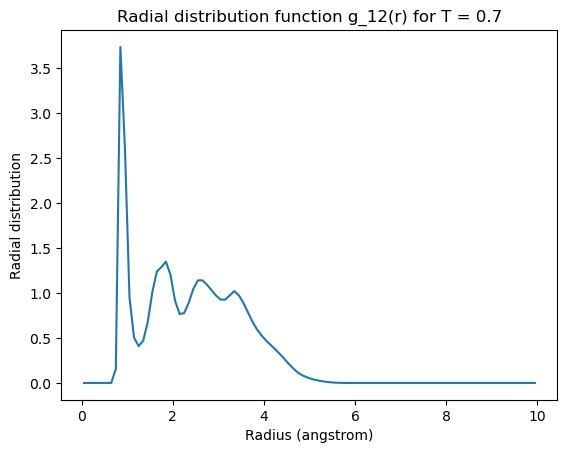

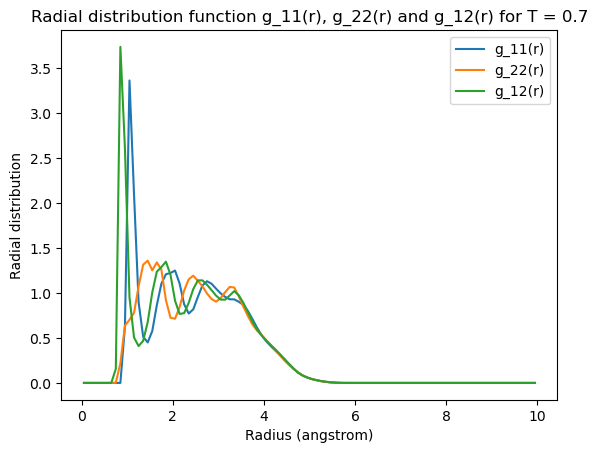

In [48]:
# Selecring the atoms 1 and 2 for the rdf calculation at T=0.8
traj0_7_a1 = traj0_7.select_atoms("type 1")
traj0_7_a2 = traj0_7.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_7_a1, traj0_7_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.7')
plt.savefig('g_11_T0.7.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_7_a2, traj0_7_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.7')
plt.savefig('g_22_T0.7.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_7_a1, traj0_7_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.7')
plt.savefig('g_12_T0.7.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.7')
plt.legend()
plt.savefig('g_11_22_12_T0.7.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

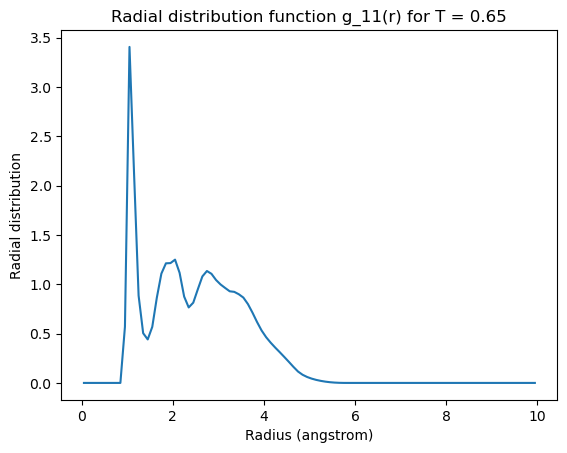

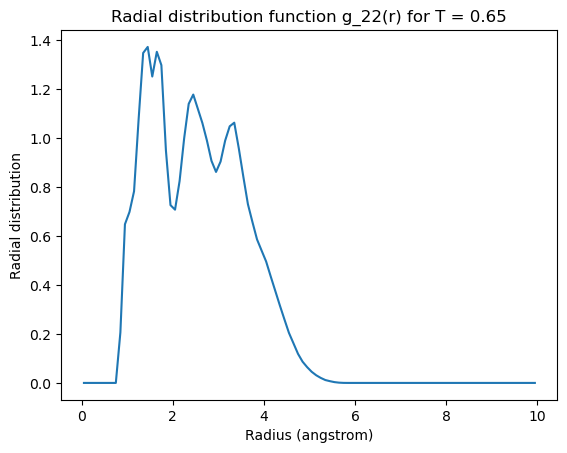

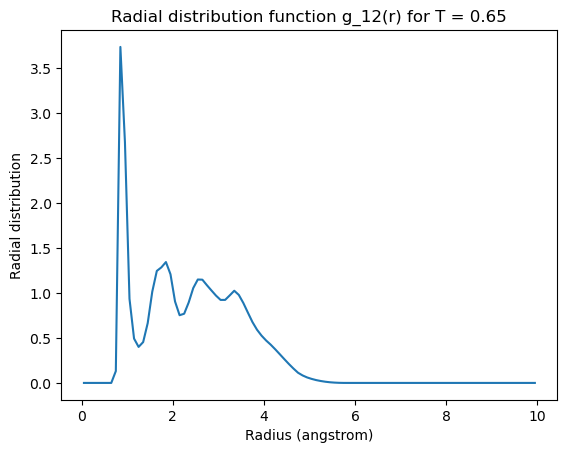

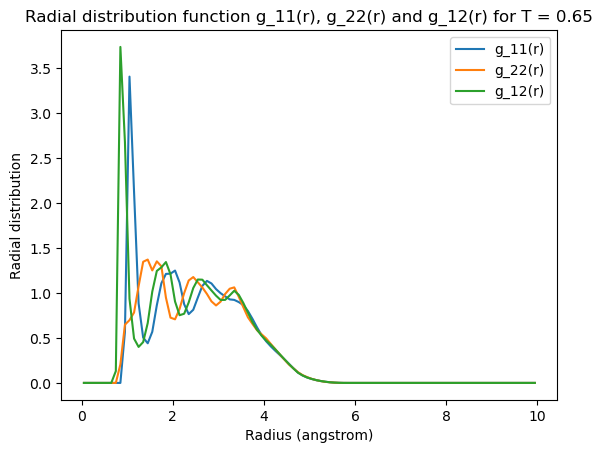

In [49]:
# Selecring the atoms 1 and 2 for the rdf calculation at T=0.65
traj0_65_a1 = traj0_65.select_atoms("type 1")
traj0_65_a2 = traj0_65.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_65_a1, traj0_65_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.65')
plt.savefig('g_11_T0.65.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_65_a2, traj0_65_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.65')
plt.savefig('g_22_T0.65.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_65_a1, traj0_65_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.65')
plt.savefig('g_12_T0.65.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.65')
plt.legend()
plt.savefig('g_11_22_12_T0.65.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

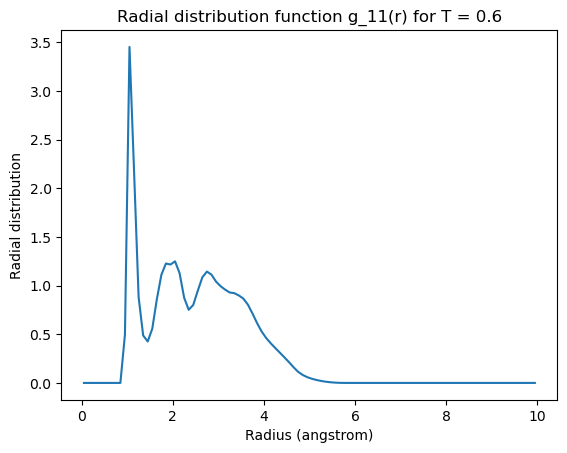

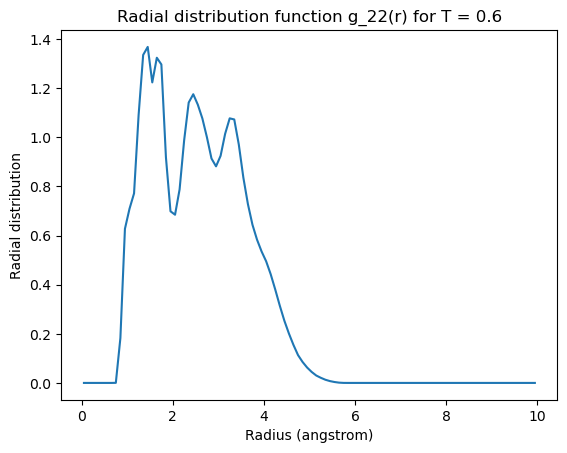

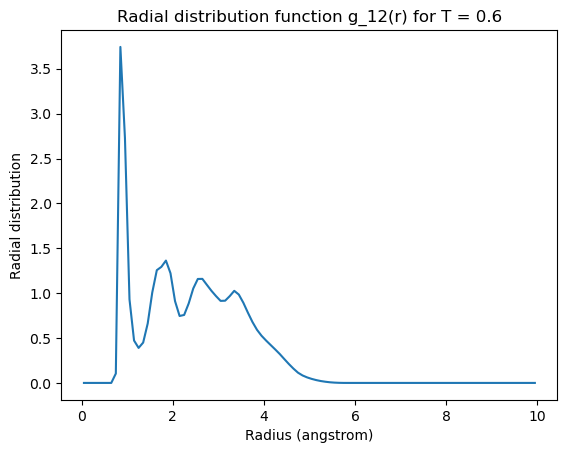

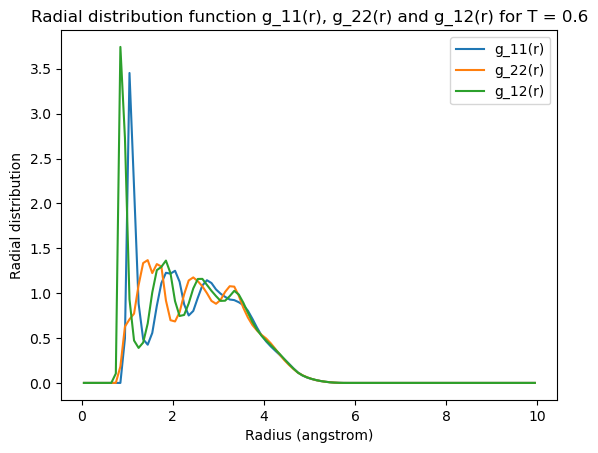

In [50]:
# Selecring the atoms 1 and 2 for the rdf calculation at T=0.6
traj0_6_a1 = traj0_6.select_atoms("type 1")
traj0_6_a2 = traj0_6.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_6_a1, traj0_6_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.6')
plt.savefig('g_11_T0.6.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_6_a2, traj0_6_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.6')
plt.savefig('g_22_T0.6.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_6_a1, traj0_6_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.6')
plt.savefig('g_12_T0.6.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.6')
plt.legend()
plt.savefig('g_11_22_12_T0.6.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

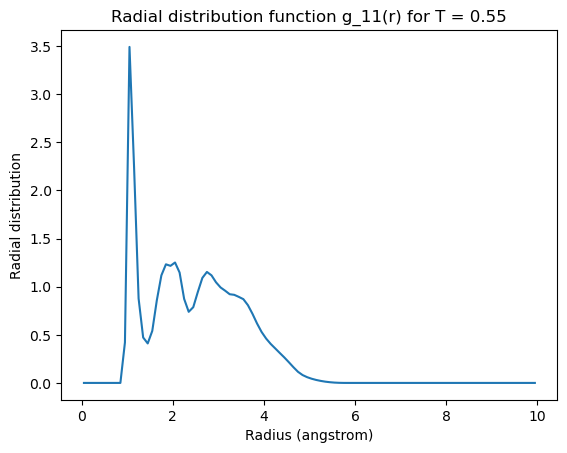

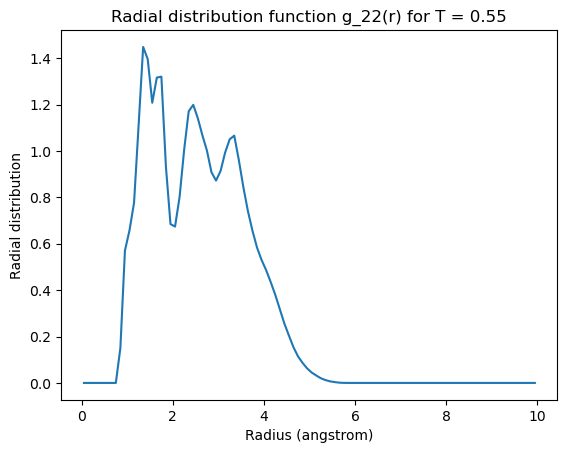

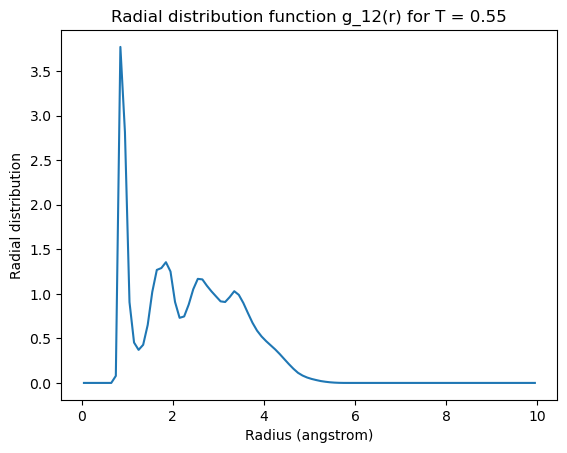

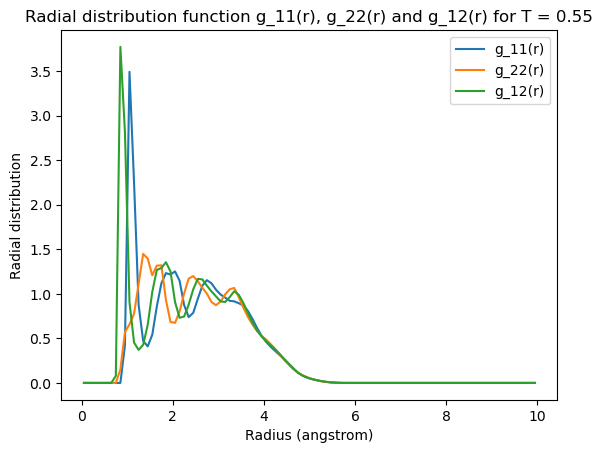

In [51]:
# Selecring the atoms 1 and 2 for the rdf calculation at T=0.55
traj0_55_a1 = traj0_55.select_atoms("type 1")
traj0_55_a2 = traj0_55.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_55_a1, traj0_55_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.55')
plt.savefig('g_11_T0.55.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_55_a2, traj0_55_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.55')
plt.savefig('g_22_T0.55.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_55_a1, traj0_55_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.55')
plt.savefig('g_12_T0.55.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.55')
plt.legend()
plt.savefig('g_11_22_12_T0.55.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

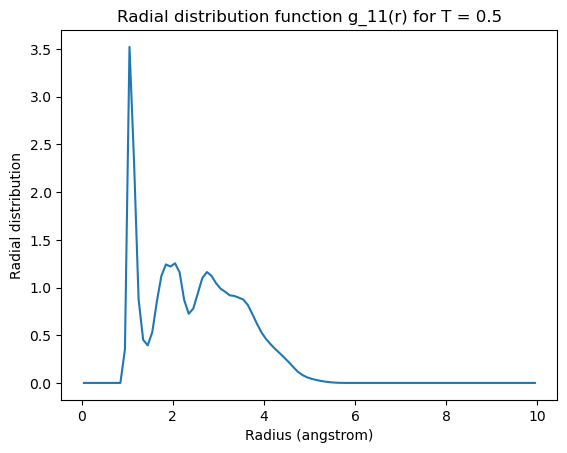

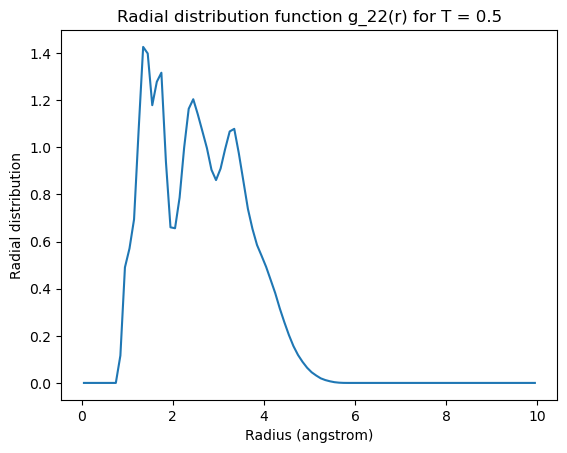

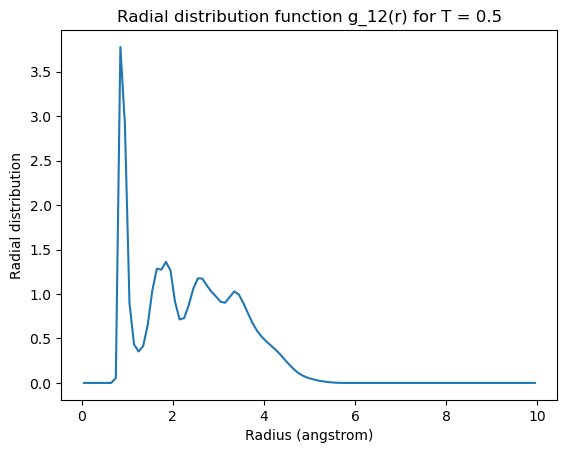

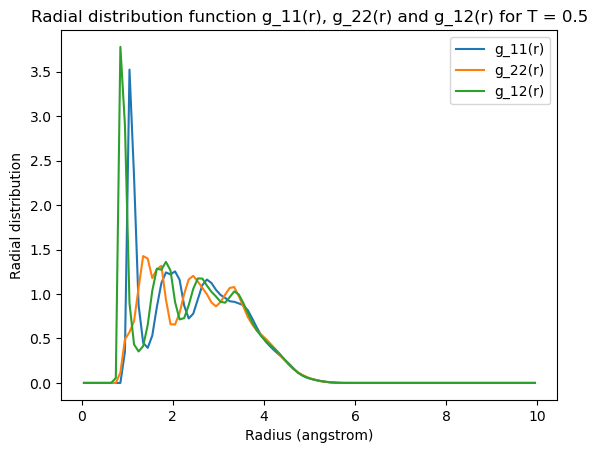

In [52]:
# Selecring the atoms 1 and 2 for the rdf calculation at T=0.5
traj0_5_a1 = traj0_5.select_atoms("type 1")
traj0_5_a2 = traj0_5.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_5_a1, traj0_5_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.5')
plt.savefig('g_11_T0.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_5_a2, traj0_5_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.5')
plt.savefig('g_22_T0.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_5_a1, traj0_5_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.5')
plt.savefig('g_12_T0.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.5')
plt.legend()
plt.savefig('g_11_22_12_T0.5.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

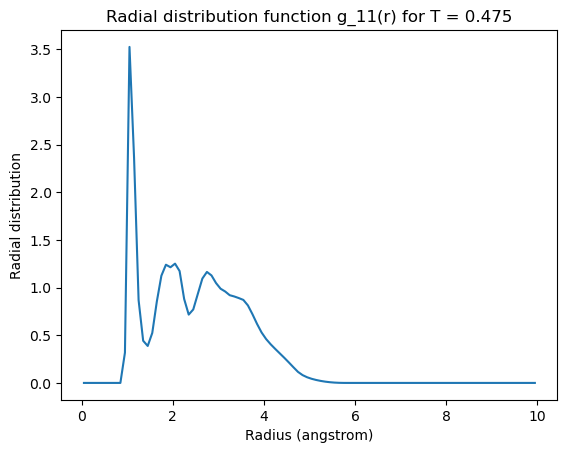

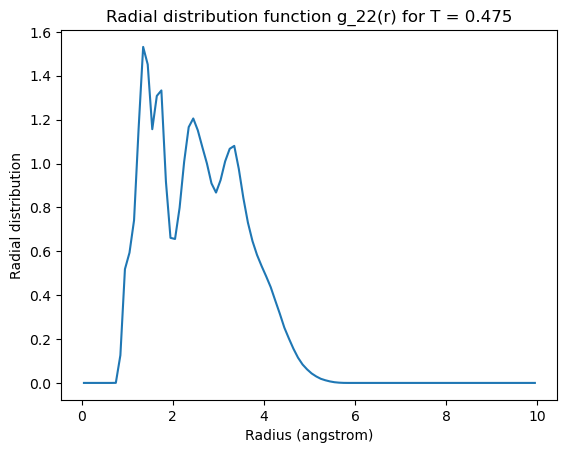

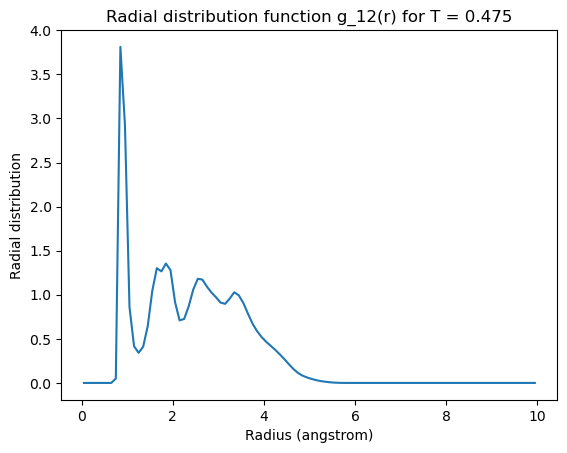

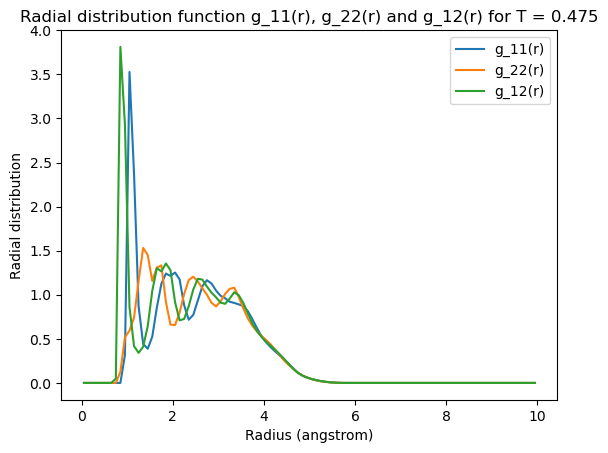

In [53]:
# Selecring the atoms 1 and 2 for the rdf calculation at T=0.475
traj0_475_a1 = traj0_475.select_atoms("type 1")
traj0_475_a2 = traj0_475.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_475_a1, traj0_475_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)

plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.475')
plt.savefig('g_11_T0.475.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_475_a2, traj0_475_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.475')
plt.savefig('g_22_T0.475.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_475_a1, traj0_475_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.475')
plt.savefig('g_12_T0.475.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.475')
plt.legend()
plt.savefig('g_11_22_12_T0.475.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

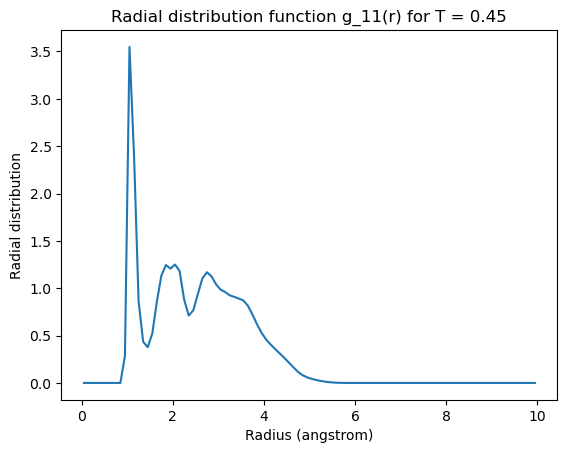

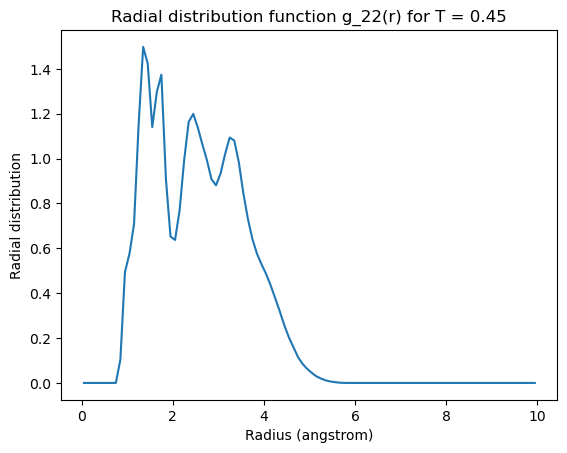

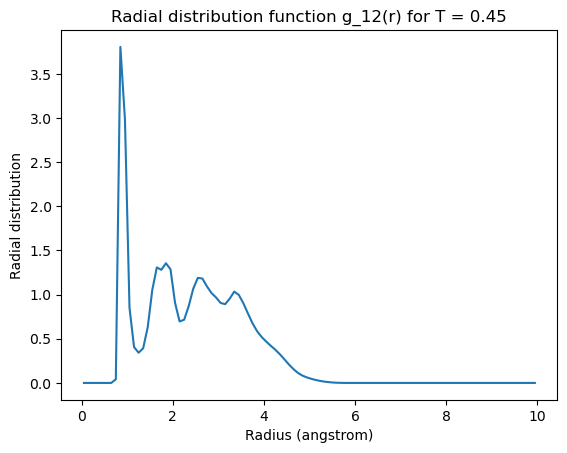

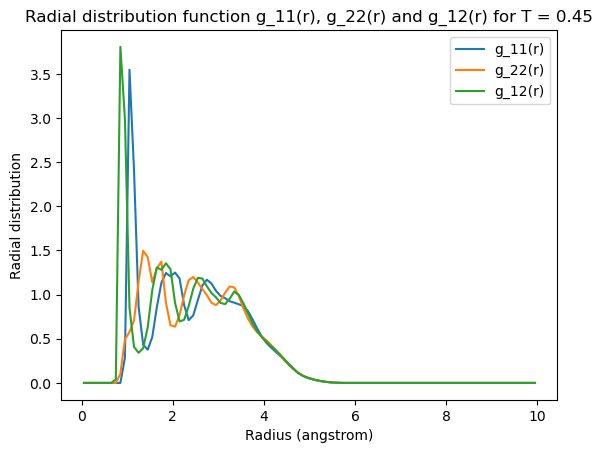

In [54]:
# Selecring the atoms 1 and 2 for the rdf calculation at T=0.45
traj0_45_a1 = traj0_45.select_atoms("type 1")
traj0_45_a2 = traj0_45.select_atoms("type 2")
# Calculating the average radial distribution function for atoms 1 to itself
irdf11 = rdf.InterRDF(traj0_45_a1, traj0_45_a1, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf11.run()
plt.plot(irdf11.results.bins, irdf11.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for T = 0.45')
plt.savefig('g_11_T0.45.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 2 to itself
irdf22 = rdf.InterRDF(traj0_45_a2, traj0_45_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf22.run()
plt.plot(irdf22.results.bins, irdf22.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_22(r) for T = 0.45')
plt.savefig('g_22_T0.45.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Calculating the average radial distribution function for atoms 1 to 2
irdf12 = rdf.InterRDF(traj0_45_a1, traj0_45_a2, nbins=100, range=(0.0, 10.0), exclusion_block=(1, 1))
irdf12.run()
plt.plot(irdf12.results.bins, irdf12.results.rdf)
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for T = 0.45')
plt.savefig('g_12_T0.45.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Overlap of the radial distribution functions for atoms 1 to iself, atoms 2 to itself and atoms 1 to 2
plt.plot(irdf11.results.bins, irdf11.results.rdf, label='g_11(r)')
plt.plot(irdf22.results.bins, irdf22.results.rdf, label='g_22(r)')
plt.plot(irdf12.results.bins, irdf12.results.rdf, label='g_12(r)')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r), g_22(r) and g_12(r) for T = 0.45')
plt.legend()
plt.savefig('g_11_22_12_T0.45.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()


# Overlaid plot of Average radial distribution function for atoms 1 to itself for all temp

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:316: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)
/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/analysis/rdf.py:324: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)


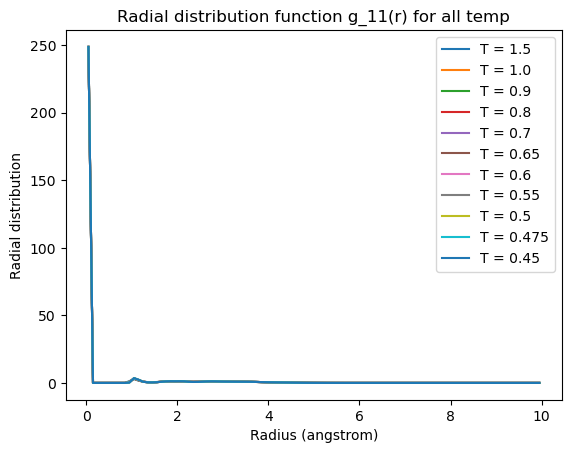

In [55]:
# Calculating the average radial distribution function for atoms 1 to itself for all temp
irdf11_1_5 = rdf.InterRDF(traj1_5_a1, traj1_5_a1, nbins=100, range=(0.0, 10.0) )
irdf11_1_5.run()
irdf11_1_0 = rdf.InterRDF(traj1_0_a1, traj1_0_a1, nbins=100, range=(0.0, 10.0))
irdf11_1_0.run()
irdf11_0_9 = rdf.InterRDF(traj0_9_a1, traj0_9_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_9.run()
irdf11_0_8 = rdf.InterRDF(traj0_8_a1, traj0_8_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_8.run()
irdf11_0_7 = rdf.InterRDF(traj0_7_a1, traj0_7_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_7.run()
irdf11_0_65 = rdf.InterRDF(traj0_65_a1, traj0_65_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_65.run()
irdf11_0_6 = rdf.InterRDF(traj0_6_a1, traj0_6_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_6.run()
irdf11_0_55 = rdf.InterRDF(traj0_55_a1, traj0_55_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_55.run()
irdf11_0_5 = rdf.InterRDF(traj0_5_a1, traj0_5_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_5.run()
irdf11_0_475 = rdf.InterRDF(traj0_475_a1, traj0_475_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_475.run()
irdf11_0_45 = rdf.InterRDF(traj0_45_a1, traj0_45_a1, nbins=100, range=(0.0, 10.0))
irdf11_0_45.run()
# Plotting the average radial distribution function for atoms 1 to itself for all temp
# plt.plot(irdf11_1_5.results.bins, irdf11_1_5.results.rdf, label='T = 1.5')
# plt.plot(irdf11_1_0.results.bins, irdf11_1_0.results.rdf, label='T = 1.0')
# plt.plot(irdf11_0_9.results.bins, irdf11_0_9.results.rdf, label='T = 0.9')
# plt.plot(irdf11_0_8.results.bins, irdf11_0_8.results.rdf, label='T = 0.8')
# plt.plot(irdf11_0_7.results.bins, irdf11_0_7.results.rdf, label='T = 0.7')
# plt.plot(irdf11_0_65.results.bins, irdf11_0_65.results.rdf, label='T = 0.65')
# plt.plot(irdf11_0_6.results.bins, irdf11_0_6.results.rdf, label='T = 0.6')
# plt.plot(irdf11_0_55.results.bins, irdf11_0_55.results.rdf, label='T = 0.55')
# plt.plot(irdf11_0_5.results.bins, irdf11_0_5.results.rdf, label='T = 0.5')
# plt.plot(irdf11_0_475.results.bins, irdf11_0_475.results.rdf, label='T = 0.475')
# plt.plot(irdf11_0_45.results.bins, irdf11_0_45.results.rdf, label='T = 0.45')
plt.plot(irdf11_1_5.bins, irdf11_1_5.rdf, label='T = 1.5')
plt.plot(irdf11_1_0.bins, irdf11_1_0.rdf, label='T = 1.0')
plt.plot(irdf11_0_9.bins, irdf11_0_9.rdf, label='T = 0.9')
plt.plot(irdf11_0_8.bins, irdf11_0_8.rdf, label='T = 0.8')
plt.plot(irdf11_0_7.bins, irdf11_0_7.rdf, label='T = 0.7')
plt.plot(irdf11_0_65.bins, irdf11_0_65.rdf, label='T = 0.65')
plt.plot(irdf11_0_6.bins, irdf11_0_6.rdf, label='T = 0.6')
plt.plot(irdf11_0_55.bins, irdf11_0_55.rdf, label='T = 0.55')
plt.plot(irdf11_0_5.bins, irdf11_0_5.rdf, label='T = 0.5')
plt.plot(irdf11_0_475.bins, irdf11_0_475.rdf, label='T = 0.475')
plt.plot(irdf11_0_45.bins, irdf11_0_45.rdf, label='T = 0.45')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_11(r) for all temp')
# plt.ylim([0,5])
plt.legend()
plt.savefig('g_11_allT.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

# Overlaid plot of Average radial distribution function for atoms 2 to itself for all temp

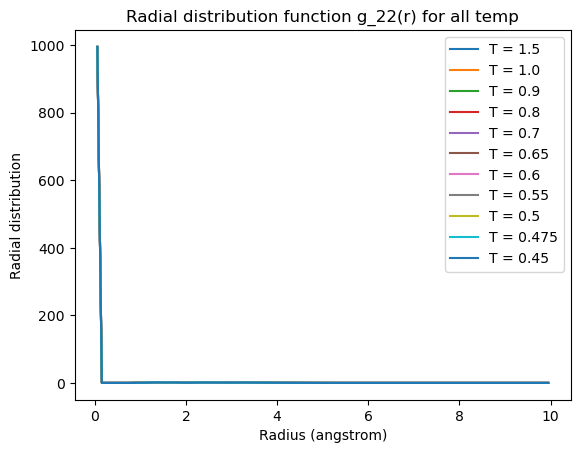

In [56]:
# Calculating the average radial distribution function for atoms 2 to itself for all temp
irdf22_1_5 = rdf.InterRDF(traj1_5_a2, traj1_5_a2, nbins=100, range=(0.0, 10.0))
irdf22_1_5.run()
irdf22_1_0 = rdf.InterRDF(traj1_0_a2, traj1_0_a2, nbins=100, range=(0.0, 10.0))
irdf22_1_0.run()
irdf22_0_9 = rdf.InterRDF(traj0_9_a2, traj0_9_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_9.run()
irdf22_0_8 = rdf.InterRDF(traj0_8_a2, traj0_8_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_8.run()
irdf22_0_7 = rdf.InterRDF(traj0_7_a2, traj0_7_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_7.run()
irdf22_0_65 = rdf.InterRDF(traj0_65_a2, traj0_65_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_65.run()
irdf22_0_6 = rdf.InterRDF(traj0_6_a2, traj0_6_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_6.run()
irdf22_0_55 = rdf.InterRDF(traj0_55_a2, traj0_55_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_55.run()
irdf22_0_5 = rdf.InterRDF(traj0_5_a2, traj0_5_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_5.run()
irdf22_0_475 = rdf.InterRDF(traj0_475_a2, traj0_475_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_475.run()
irdf22_0_45 = rdf.InterRDF(traj0_45_a2, traj0_45_a2, nbins=100, range=(0.0, 10.0))
irdf22_0_45.run()
# Plotting the average radial distribution function for atoms 2 to itself for all temp
plt.plot(irdf22_1_5.results.bins, irdf22_1_5.results.rdf, label='T = 1.5')
plt.plot(irdf22_1_0.results.bins, irdf22_1_0.results.rdf, label='T = 1.0')
plt.plot(irdf22_0_9.results.bins, irdf22_0_9.results.rdf, label='T = 0.9')
plt.plot(irdf22_0_8.results.bins, irdf22_0_8.results.rdf, label='T = 0.8')
plt.plot(irdf22_0_7.results.bins, irdf22_0_7.results.rdf, label='T = 0.7')
plt.plot(irdf22_0_65.results.bins, irdf22_0_65.results.rdf, label='T = 0.65')
plt.plot(irdf22_0_6.results.bins, irdf22_0_6.results.rdf, label='T = 0.6')
plt.plot(irdf22_0_55.results.bins, irdf22_0_55.results.rdf, label='T = 0.55')
plt.plot(irdf22_0_5.results.bins, irdf22_0_5.results.rdf, label='T = 0.5')
plt.plot(irdf22_0_475.results.bins, irdf22_0_475.results.rdf, label='T = 0.475')
plt.plot(irdf22_0_45.results.bins, irdf22_0_45.results.rdf, label='T = 0.45')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
# plt.ylim([0,5])
plt.title('Radial distribution function g_22(r) for all temp')
plt.legend()
plt.savefig('g_22_allT.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

# Overlaid plot of Average radial distribution function for atoms 1 to 2 for all temp

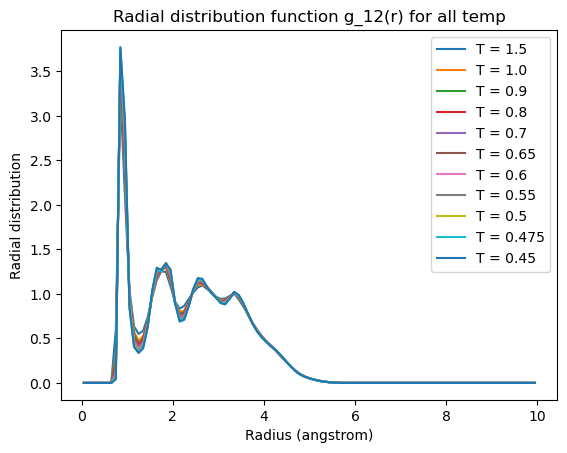

In [57]:
# Calculating the average radial distribution function for atoms 1 to 2 for all temp
irdf12_1_5 = rdf.InterRDF(traj1_5_a1, traj1_5_a2, nbins=100, range=(0.0, 10.0))
irdf12_1_5.run()
irdf12_1_0 = rdf.InterRDF(traj1_0_a1, traj1_0_a2, nbins=100, range=(0.0, 10.0))
irdf12_1_0.run()
irdf12_0_9 = rdf.InterRDF(traj0_9_a1, traj0_9_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_9.run()
irdf12_0_8 = rdf.InterRDF(traj0_8_a1, traj0_8_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_8.run()
irdf12_0_7 = rdf.InterRDF(traj0_7_a1, traj0_7_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_7.run()
irdf12_0_65 = rdf.InterRDF(traj0_65_a1, traj0_65_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_65.run()
irdf12_0_6 = rdf.InterRDF(traj0_6_a1, traj0_6_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_6.run()
irdf12_0_55 = rdf.InterRDF(traj0_55_a1, traj0_55_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_55.run()
irdf12_0_5 = rdf.InterRDF(traj0_5_a1, traj0_5_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_5.run()
irdf12_0_475 = rdf.InterRDF(traj0_475_a1, traj0_475_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_475.run()
irdf12_0_45 = rdf.InterRDF(traj0_45_a1, traj0_45_a2, nbins=100, range=(0.0, 10.0))
irdf12_0_45.run()
# Plotting the average radial distribution function for atoms 1 to 2 for all temp
plt.plot(irdf12_1_5.results.bins, irdf12_1_5.results.rdf, label='T = 1.5')
plt.plot(irdf12_1_0.results.bins, irdf12_1_0.results.rdf, label='T = 1.0')
plt.plot(irdf12_0_9.results.bins, irdf12_0_9.results.rdf, label='T = 0.9')
plt.plot(irdf12_0_8.results.bins, irdf12_0_8.results.rdf, label='T = 0.8')
plt.plot(irdf12_0_7.results.bins, irdf12_0_7.results.rdf, label='T = 0.7')
plt.plot(irdf12_0_65.results.bins, irdf12_0_65.results.rdf, label='T = 0.65')
plt.plot(irdf12_0_6.results.bins, irdf12_0_6.results.rdf, label='T = 0.6')
plt.plot(irdf12_0_55.results.bins, irdf12_0_55.results.rdf, label='T = 0.55')
plt.plot(irdf12_0_5.results.bins, irdf12_0_5.results.rdf, label='T = 0.5')
plt.plot(irdf12_0_475.results.bins, irdf12_0_475.results.rdf, label='T = 0.475')
plt.plot(irdf12_0_45.results.bins, irdf12_0_45.results.rdf, label='T = 0.45')
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('Radial distribution function g_12(r) for all temp')
plt.legend()
plt.savefig('g_12_allT.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()


# Calculating the MSD for atoms 1 and time when MSD=1 at each time

501


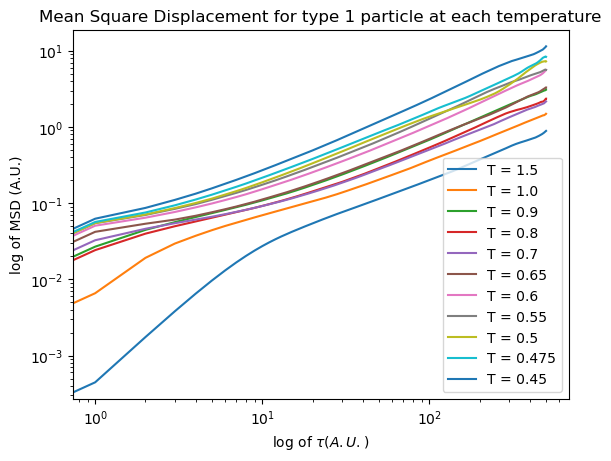

msd11_1_0 : 325
msd11_0_9 : 151
msd11_0_8 : 192
msd11_0_7 : 223
msd11_0_65 : 149
msd11_0_6 : 98
msd11_0_55 : 79
msd11_0_5 : 69
msd11_0_475 : 61
msd11_0_45 : 43
[1.         1.11111111 1.25       1.42857143 1.53846154 1.66666667
 1.81818182 2.         2.10526316 2.22222222]


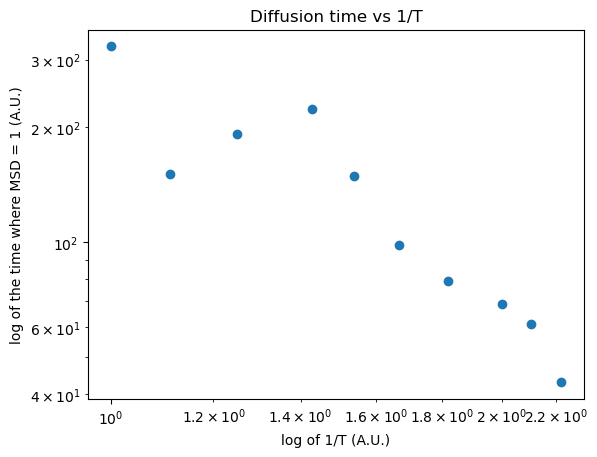

In [58]:
# Calculating the mean square displacement for atoms 1 for all temp
msd11_1_5 = msd.EinsteinMSD(traj1_5_a1, select='all', msd_type='xyz', fft=True)
msd11_1_5.run()
msd11_1_0 = msd.EinsteinMSD(traj1_0_a1, select='all', msd_type='xyz', fft=True)
msd11_1_0.run()
msd11_0_9 = msd.EinsteinMSD(traj0_9_a1, select='all', msd_type='xyz', fft=True)
msd11_0_9.run()
msd11_0_8 = msd.EinsteinMSD(traj0_8_a1, select='all', msd_type='xyz', fft=True)
msd11_0_8.run()
msd11_0_7 = msd.EinsteinMSD(traj0_7_a1, select='all', msd_type='xyz', fft=True)
msd11_0_7.run()
msd11_0_65 = msd.EinsteinMSD(traj0_65_a1, select='all', msd_type='xyz', fft=True)
msd11_0_65.run()
msd11_0_6 = msd.EinsteinMSD(traj0_6_a1, select='all', msd_type='xyz', fft=True)
msd11_0_6.run()
msd11_0_55 = msd.EinsteinMSD(traj0_55_a1, select='all', msd_type='xyz', fft=True)
msd11_0_55.run()
msd11_0_5 = msd.EinsteinMSD(traj0_5_a1, select='all', msd_type='xyz', fft=True)
msd11_0_5.run()
msd11_0_475 = msd.EinsteinMSD(traj0_475_a1, select='all', msd_type='xyz', fft=True)
msd11_0_475.run()
msd11_0_45 = msd.EinsteinMSD(traj0_45_a1, select='all', msd_type='xyz', fft=True)
msd11_0_45.run()
# Plotting the mean square displacement for atoms 1 for all temp
# Prof Hocky: timestep*dumptime = what frame means
msd11_1_5_y =  msd11_1_5.results.timeseries
frametime_1_5 = 0.002*10000
nframes_1_5 = msd11_1_5.n_frames
msd11_1_5_x = np.arange(nframes_1_5)*frametime_1_5
msd11_1_0_y =  msd11_1_0.results.timeseries
frametime_1_0 = 0.002*10000
nframes_1_0 = msd11_1_0.n_frames
msd11_1_0_x = np.arange(nframes_1_0)*frametime_1_0
msd11_0_9_y =  msd11_0_9.results.timeseries
frametime_0_9 = 0.002*50000
nframes_0_9 = msd11_0_9.n_frames
msd11_0_9_x = np.arange(nframes_0_9)*frametime_0_9
msd11_0_8_y =  msd11_0_8.results.timeseries
frametime_0_8 = 0.002*50000
nframes_0_8 = msd11_0_8.n_frames
msd11_0_8_x = np.arange(nframes_0_8)*frametime_0_8
msd11_0_7_y =  msd11_0_7.results.timeseries
frametime_0_7 = 0.003*60000
nframes_0_7 = msd11_0_7.n_frames
msd11_0_7_x = np.arange(nframes_0_7)*frametime_0_7
msd11_0_65_y =  msd11_0_65.results.timeseries
frametime_0_65 = 0.003*70000
nframes_0_65 = msd11_0_65.n_frames
msd11_0_65_x = np.arange(nframes_0_65)*frametime_0_65
msd11_0_6_y =  msd11_0_6.results.timeseries
frametime_0_6 = 0.003*100000
nframes_0_6 = msd11_0_6.n_frames
msd11_0_6_x = np.arange(nframes_0_6)*frametime_0_6
msd11_0_55_y =  msd11_0_55.results.timeseries
frametime_0_55 = 0.003*300000
nframes_0_55 = msd11_0_55.n_frames
msd11_0_55_x = np.arange(nframes_0_55)*frametime_0_55
msd11_0_5_y =  msd11_0_5.results.timeseries
frametime_0_5 = 0.003*1000000
nframes_0_5 = msd11_0_5.n_frames
msd11_0_5_x = np.arange(nframes_0_5)*frametime_0_5
msd11_0_475_y =  msd11_0_475.results.timeseries
frametime_0_475 = 0.003*3000000
nframes_0_475 = msd11_0_475.n_frames
msd11_0_475_x = np.arange(nframes_0_475)*frametime_0_475
msd11_0_45_y =  msd11_0_45.results.timeseries
frametime_0_45 = 0.003*10000000
nframes_0_45 = msd11_0_45.n_frames
msd11_0_45_x = np.arange(nframes_0_45)*frametime_0_45
print(nframes_0_9)
timestep = 1 # this needs to be the actual time between frames
lagtimes = np.arange(nframes_1_5)*timestep # make the lag-time axis
plt.loglog(lagtimes, msd11_1_5_y, label='T = 1.5')
plt.loglog(lagtimes, msd11_1_0_y, label='T = 1.0')
plt.loglog(lagtimes, msd11_0_9_y, label='T = 0.9')
plt.loglog(lagtimes, msd11_0_8_y, label='T = 0.8')
plt.loglog(lagtimes, msd11_0_7_y, label='T = 0.7')
plt.loglog(lagtimes, msd11_0_65_y, label='T = 0.65')
plt.loglog(lagtimes, msd11_0_6_y, label='T = 0.6')
plt.loglog(lagtimes, msd11_0_55_y, label='T = 0.55')
plt.loglog(lagtimes, msd11_0_5_y, label='T = 0.5')
plt.loglog(lagtimes, msd11_0_475_y, label='T = 0.475')
plt.loglog(lagtimes, msd11_0_45_y, label='T = 0.45')
plt.ylabel('log of MSD (A.U.)')
plt.xlabel(r'log of $\tau   (A.U.)$')
plt.legend()
plt.legend(loc='lower right')
plt.title('Mean Square Displacement for type 1 particle at each temperature')
plt.savefig('Mean Square Displacement for type 1 particle at each temperature.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Find the frame where msd11_1_5_y = 1 at each temperature
temp = [1.5, 1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475, 0.45]
diffuse_time=[]
diffuse_temp=[]
for n in temp:
     name = "msd11_" + str(n).replace(".", "_")
     traj = globals()[name]
     nframes = traj.n_frames
     traj=traj.results.timeseries
     for i in range(len(traj)):
        if traj[i] >= 1:
            print(name,':' , i)
            # store the frame number in a np array
            # store i in an array
            diffuse_time = np.append(diffuse_time, i)
            diffuse_temp = np.append(diffuse_temp, n)
            break

diffuse_temp=1/diffuse_temp
print(diffuse_temp)
plt.loglog(diffuse_temp, diffuse_time, 'o')
plt.ylabel('log of the time where MSD = 1 (A.U.)')
plt.xlabel('log of 1/T (A.U.)')
plt.title('Diffusion time vs 1/T')
plt.savefig('Diffusion time vs inverse of T.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()


501


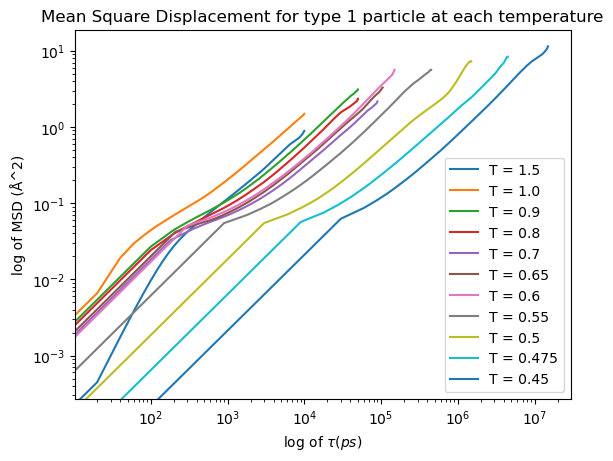

msd11_1_0 : 325
time: 6500.0
msd11_0_9 : 151
time: 15100.0
msd11_0_8 : 192
time: 19200.0
msd11_0_7 : 223
time: 40140.0
msd11_0_65 : 149
time: 31290.0
msd11_0_6 : 98
time: 29400.0
msd11_0_55 : 79
time: 71100.0
msd11_0_5 : 69
time: 207000.0
msd11_0_475 : 61
time: 549000.0
msd11_0_45 : 43
time: 1290000.0
[1.         1.11111111 1.25       1.42857143 1.53846154 1.66666667
 1.81818182 2.         2.10526316 2.22222222]


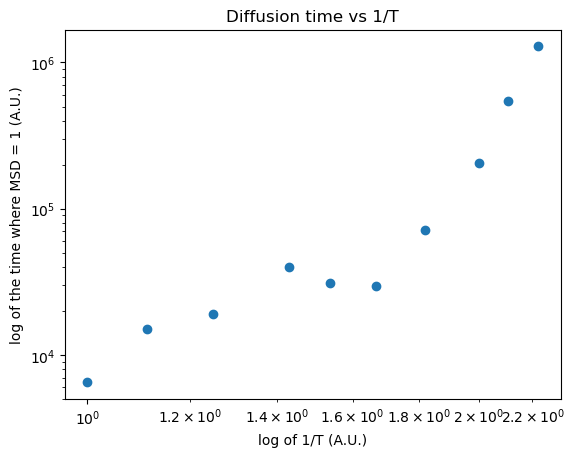

In [59]:
# Calculating the mean square displacement for atoms 1 for all temp
msd11_1_5 = msd.EinsteinMSD(traj1_5_a1, select='all', msd_type='xyz', fft=True)
msd11_1_5.run()
msd11_1_0 = msd.EinsteinMSD(traj1_0_a1, select='all', msd_type='xyz', fft=True)
msd11_1_0.run()
msd11_0_9 = msd.EinsteinMSD(traj0_9_a1, select='all', msd_type='xyz', fft=True)
msd11_0_9.run()
msd11_0_8 = msd.EinsteinMSD(traj0_8_a1, select='all', msd_type='xyz', fft=True)
msd11_0_8.run()
msd11_0_7 = msd.EinsteinMSD(traj0_7_a1, select='all', msd_type='xyz', fft=True)
msd11_0_7.run()
msd11_0_65 = msd.EinsteinMSD(traj0_65_a1, select='all', msd_type='xyz', fft=True)
msd11_0_65.run()
msd11_0_6 = msd.EinsteinMSD(traj0_6_a1, select='all', msd_type='xyz', fft=True)
msd11_0_6.run()
msd11_0_55 = msd.EinsteinMSD(traj0_55_a1, select='all', msd_type='xyz', fft=True)
msd11_0_55.run()
msd11_0_5 = msd.EinsteinMSD(traj0_5_a1, select='all', msd_type='xyz', fft=True)
msd11_0_5.run()
msd11_0_475 = msd.EinsteinMSD(traj0_475_a1, select='all', msd_type='xyz', fft=True)
msd11_0_475.run()
msd11_0_45 = msd.EinsteinMSD(traj0_45_a1, select='all', msd_type='xyz', fft=True)
msd11_0_45.run()
# Plotting the mean square displacement for atoms 1 for all temp
# Prof Hocky: timestep*dumptime = what frame means
msd11_1_5_y =  msd11_1_5.results.timeseries
frametime_1_5 = 0.002*10000
nframes_1_5 = msd11_1_5.n_frames
msd11_1_5_x = np.arange(nframes_1_5)*frametime_1_5
msd11_1_0_y =  msd11_1_0.results.timeseries
frametime_1_0 = 0.002*10000
nframes_1_0 = msd11_1_0.n_frames
msd11_1_0_x = np.arange(nframes_1_0)*frametime_1_0
msd11_0_9_y =  msd11_0_9.results.timeseries
frametime_0_9 = 0.002*50000
nframes_0_9 = msd11_0_9.n_frames
msd11_0_9_x = np.arange(nframes_0_9)*frametime_0_9
msd11_0_8_y =  msd11_0_8.results.timeseries
frametime_0_8 = 0.002*50000
nframes_0_8 = msd11_0_8.n_frames
msd11_0_8_x = np.arange(nframes_0_8)*frametime_0_8
msd11_0_7_y =  msd11_0_7.results.timeseries
frametime_0_7 = 0.003*60000
nframes_0_7 = msd11_0_7.n_frames
msd11_0_7_x = np.arange(nframes_0_7)*frametime_0_7
msd11_0_65_y =  msd11_0_65.results.timeseries
frametime_0_65 = 0.003*70000
nframes_0_65 = msd11_0_65.n_frames
msd11_0_65_x = np.arange(nframes_0_65)*frametime_0_65
msd11_0_6_y =  msd11_0_6.results.timeseries
frametime_0_6 = 0.003*100000
nframes_0_6 = msd11_0_6.n_frames
msd11_0_6_x = np.arange(nframes_0_6)*frametime_0_6
msd11_0_55_y =  msd11_0_55.results.timeseries
frametime_0_55 = 0.003*300000
nframes_0_55 = msd11_0_55.n_frames
msd11_0_55_x = np.arange(nframes_0_55)*frametime_0_55
msd11_0_5_y =  msd11_0_5.results.timeseries
frametime_0_5 = 0.003*1000000
nframes_0_5 = msd11_0_5.n_frames
msd11_0_5_x = np.arange(nframes_0_5)*frametime_0_5
msd11_0_475_y =  msd11_0_475.results.timeseries
frametime_0_475 = 0.003*3000000
nframes_0_475 = msd11_0_475.n_frames
msd11_0_475_x = np.arange(nframes_0_475)*frametime_0_475
msd11_0_45_y =  msd11_0_45.results.timeseries
frametime_0_45 = 0.003*10000000
nframes_0_45 = msd11_0_45.n_frames
msd11_0_45_x = np.arange(nframes_0_45)*frametime_0_45
print(nframes_0_9)
timestep = 1 # this needs to be the actual time between frames
lagtimes = np.arange(nframes)*timestep # make the lag-time axis
plt.loglog(msd11_1_5_x, msd11_1_5_y, label='T = 1.5')
plt.loglog(msd11_1_0_x, msd11_1_0_y, label='T = 1.0')
plt.loglog(msd11_0_9_x, msd11_0_9_y, label='T = 0.9')
plt.loglog(msd11_0_8_x, msd11_0_8_y, label='T = 0.8')
plt.loglog(msd11_0_7_x, msd11_0_7_y, label='T = 0.7')
plt.loglog(msd11_0_65_x, msd11_0_65_y, label='T = 0.65')
plt.loglog(msd11_0_6_x, msd11_0_6_y, label='T = 0.6')
plt.loglog(msd11_0_55_x, msd11_0_55_y, label='T = 0.55')
plt.loglog(msd11_0_5_x, msd11_0_5_y, label='T = 0.5')
plt.loglog(msd11_0_475_x, msd11_0_475_y, label='T = 0.475')
plt.loglog(msd11_0_45_x, msd11_0_45_y, label='T = 0.45')
plt.ylabel('log of MSD (Å^2)')
plt.xlabel(r'log of $\tau   (ps)$')
plt.legend()
plt.legend(loc='lower right')
plt.title('Mean Square Displacement for type 1 particle at each temperature')
plt.savefig('Mean Square Displacement for type 1 particle at each temperature.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
# Find the frame where msd11_1_5_y = 1 at each temperature
temp = [1.5, 1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475, 0.45]
diffuse_time=[]
diffuse_temp=[]
for n in temp:
     name = "msd11_" + str(n).replace(".", "_")
     frametime= "frametime_" + str(n).replace(".", "_")
     frametime=globals()[frametime]
     traj = globals()[name]
     nframes = traj.n_frames
     traj=traj.results.timeseries
     for i in range(len(traj)):
        if traj[i] >= 1:
            print(name,':' , i)
            # store the frame number in a np array
            # store i in an array
            time=frametime*i
            print('time:',time)
            diffuse_time = np.append(diffuse_time, time)
            diffuse_temp = np.append(diffuse_temp, n)
            break

diffuse_temp=1/diffuse_temp
print(diffuse_temp)
plt.loglog(diffuse_temp, diffuse_time, 'o')
plt.ylabel('log of the time where MSD = 1 (A.U.)')
plt.xlabel('log of 1/T (A.U.)')
plt.title('Diffusion time vs 1/T')
plt.savefig('Diffusion time vs inverse of T.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()


In [60]:
# timestep*dumptime=what frame means
# Could not find MSD=1 for T=1.5
# Try extrapolation to get it

f: 10813.353247884968
f: 6486.662302593139
f: 15014.425022112646
f: 19122.72161363706
f: 39965.485027106144
f: 31229.762386192495
f: 29121.618909448047
f: 70261.1740133997
f: 206453.0559401972
f: 547671.8777776347
f: 1275232.3805067674
[0.66666667 1.         1.11111111 1.25       1.42857143 1.53846154
 1.66666667 1.81818182 2.         2.10526316 2.22222222]


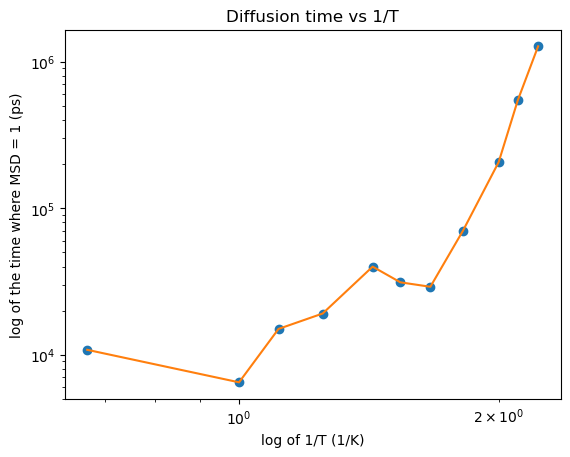

In [63]:
from scipy import interpolate

# Find the frame where msd11_1_5_y = 1 at each temperature
temp = [1.5, 1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475, 0.45]
diffuse_time=[]
diffuse_temp=[]
for n in temp:
# time
     xdata = "msd11_" + str(n).replace(".", "_") +"_x"
     xdata = globals()[xdata]
# msd
     ydata = "msd11_" + str(n).replace(".", "_") +"_y"
     ydata = globals()[ydata]
# use interpolation to find msd =1
     f = interpolate.interp1d(ydata, xdata, fill_value='extrapolate')
     print ("f:",f(1))
     diffuse_temp = np.append(diffuse_temp, n)
     diffuse_time = np.append(diffuse_time, f(1))
     

diffuse_temp=1/diffuse_temp
print(diffuse_temp)
plt.loglog(diffuse_temp, diffuse_time, 'o')
# plot the line connecting the points
plt.loglog(diffuse_temp, diffuse_time)
plt.ylabel('log of the time where MSD = 1 (ps)')
plt.xlabel('log of 1/T (1/K)')
plt.title('Diffusion time vs 1/T')
plt.savefig('Diffusion time vs inverse of T.pdf', format='pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()
